In [5]:

pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import numpy as np
import cv2 
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#IF YOU WANT TO REPLICATE, CHANGE FILEPATH (Mine has "archive" folder, with "test" and "train" folders with 7 emotions folders in each")
dataset_path = "../Data"

# Define emotion labels (folder names)
emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
img_size = 48  

def load_images_from_folder(folder_path, label):
    """Load images from a specific folder and return them with labels."""
    images, labels = [], []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:  # Ensure image is loaded correctly
            img = cv2.resize(img, (img_size, img_size)) 
            images.append(img)
            labels.append(label)
    return images, labels

# Load training data
X_train, y_train = [], []
for label, emotion in enumerate(emotions):
    train_path = os.path.join(dataset_path, "train", emotion)
    imgs, labels = load_images_from_folder(train_path, label)
    X_train.extend(imgs)
    y_train.extend(labels)

# Load test data
X_test, y_test = [], []
for label, emotion in enumerate(emotions):
    test_path = os.path.join(dataset_path, "test", emotion)
    imgs, labels = load_images_from_folder(test_path, label)
    X_test.extend(imgs)
    y_test.extend(labels)

# Convert lists to NumPy arrays and normalize from 0-255 to 0-1
X_train = np.array(X_train, dtype="float32") / 255.0  
X_test = np.array(X_test, dtype="float32") / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=len(emotions))
y_test = to_categorical(y_test, num_classes=len(emotions))

# Split training data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Reshape X for CNN input (add channel dimension)
X_train = X_train.reshape(-1, img_size, img_size, 1)
X_val = X_val.reshape(-1, img_size, img_size, 1)
X_test = X_test.reshape(-1, img_size, img_size, 1)


print(f"Training samples: {X_train.shape}, Validation samples: {X_val.shape}, Testing samples: {X_test.shape}")


Training samples: (22967, 48, 48, 1), Validation samples: (5742, 48, 48, 1), Testing samples: (7178, 48, 48, 1)


In [16]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22967, 48, 48, 1)
X_test shape: (7178, 48, 48, 1)
y_train shape: (22967, 7)
y_test shape: (7178, 7)


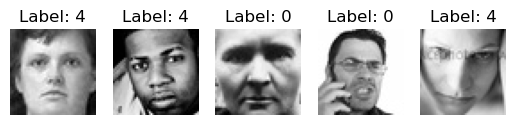

In [18]:
import matplotlib.pyplot as plt

# test
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i].squeeze(), cmap="gray")  
    plt.title(f"Label: {np.argmax(y_train[i])}")  
    plt.axis("off")

plt.show()
